In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
df1 = pd.read_csv('../kumpulan_dataset/dataset.csv')
df2 = pd.read_csv('../kumpulan_dataset/symptom_Description.csv')
df3 = pd.read_csv('../kumpulan_dataset/symptom_precaution.csv')
df4 = pd.read_csv('../kumpulan_dataset/Symptom-severity.csv')


# CLEANING

In [3]:
df1.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def cleaning():
    global df1,df4
    for col in df1.columns[1:]:        
        df1[col] = df1[col].str.replace('_', ' ')
        df1[col] = df1[col].str.replace('  ', ' ')
    #     print(col)
    
    df4['Symptom'] = df4['Symptom'].str.replace('_',' ')
    #     print(col)
    cols = df1.columns
    data = df1[cols].values.flatten()

    reshaped = pd.Series(data)
    reshaped = reshaped.str.strip()
    reshaped = reshaped.values.reshape(df1.shape)
    df1 = pd.DataFrame(reshaped, columns = df1.columns)
    
    dict_symp = dict(df4.values)
    vals = df1.values
    symptoms = list(dict_symp.keys())

    for i in range(len(symptoms)):

        vals[vals == symptoms[i]] = df4[df4['Symptom'] == symptoms[i]]['weight'].values[0]
    df1 = df1.fillna(0)
    return df1

def check(data):
    for row in data.columns[1:]:
        print(row,data[row].unique())
    
# print(df4[df4['Symptom']=='foul smell of urine'])
def info_symptom(name):
    return df4[df4['Symptom']== name]
# df1.loc[df1['Disease']=='Common Cold'].head()
def give_zero(dataframe,name):
    return dataframe.replace([name],0)


# RUN

In [5]:
preproses = cleaning()

In [11]:
preproses

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,6,4,foul smell of urine,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0


In [7]:
check(preproses)

Symptom_1 [1 3 4 5 6 7 2]
Symptom_2 [3 4 5 6 7 2 'foul smell of urine']
Symptom_3 [4 6 3 5 7 2 'foul smell of urine']
Symptom_4 [6 0 4 5 2 3 7]
Symptom_5 [0 4 7 6 5 3 2]
Symptom_6 [0 7 4 5 3 6 2]
Symptom_7 [0 4 3 2 6 5]
Symptom_8 [0 4 5 2 3 6 7]
Symptom_9 [0 5 4 3 6 7 2]
Symptom_10 [0 4 6 3 5 2]
Symptom_11 [0 3 6 4 2 5 7]
Symptom_12 [0 2 6 7 4 5]
Symptom_13 [0 3 2 6 5]
Symptom_14 [0 3 5 7]
Symptom_15 [0 7 5 3]
Symptom_16 [0 5 3 2]
Symptom_17 [0 2]


In [8]:
info_symptom('foul smell of urine')

,Symptom,weight


In [12]:
# preproses = preproses.replace(['foul smell of urine'],0)
preproses = give_zero(preproses,'foul smell of urine')

In [13]:
check(preproses)

Symptom_1 [1 3 4 5 6 7 2]
Symptom_2 [3 4 5 6 7 2 0]
Symptom_3 [4 6 3 5 7 2 0]
Symptom_4 [6 0 4 5 2 3 7]
Symptom_5 [0 4 7 6 5 3 2]
Symptom_6 [0 7 4 5 3 6 2]
Symptom_7 [0 4 3 2 6 5]
Symptom_8 [0 4 5 2 3 6 7]
Symptom_9 [0 5 4 3 6 7 2]
Symptom_10 [0 4 6 3 5 2]
Symptom_11 [0 3 6 4 2 5 7]
Symptom_12 [0 2 6 7 4 5]
Symptom_13 [0 3 2 6 5]
Symptom_14 [0 3 5 7]
Symptom_15 [0 7 5 3]
Symptom_16 [0 5 3 2]
Symptom_17 [0 2]


In [14]:

code = LabelEncoder()
preproses['label'] = code.fit_transform(preproses['Disease'])


In [15]:
# preproses.label
print(preproses['label'].unique())
print('total kelas' ,len(preproses['label'].unique()))

[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27]
total kelas 41


In [16]:
preproses

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,label
0,Fungal infection,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,15
1,Fungal infection,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
2,Fungal infection,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
3,Fungal infection,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4917,Urinary tract infection,6,4,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,38
4918,Psoriasis,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,35


In [17]:
x= preproses.drop(['label','Disease'],axis=1)
y= preproses['label']

In [18]:
x

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0
4916,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,6,4,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0


# EDA

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:>

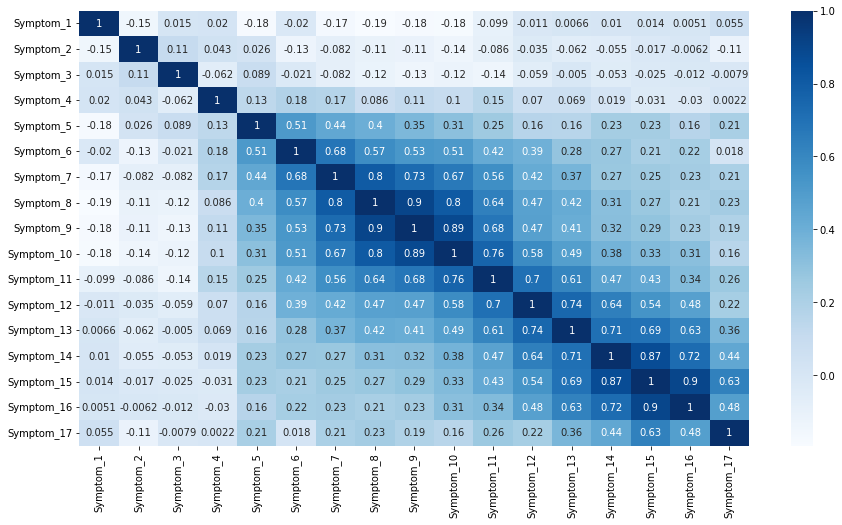

In [20]:
plt.figure(figsize=(15,8))
corr = x.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

In [21]:
x = x.iloc[:,3:]

<AxesSubplot:>

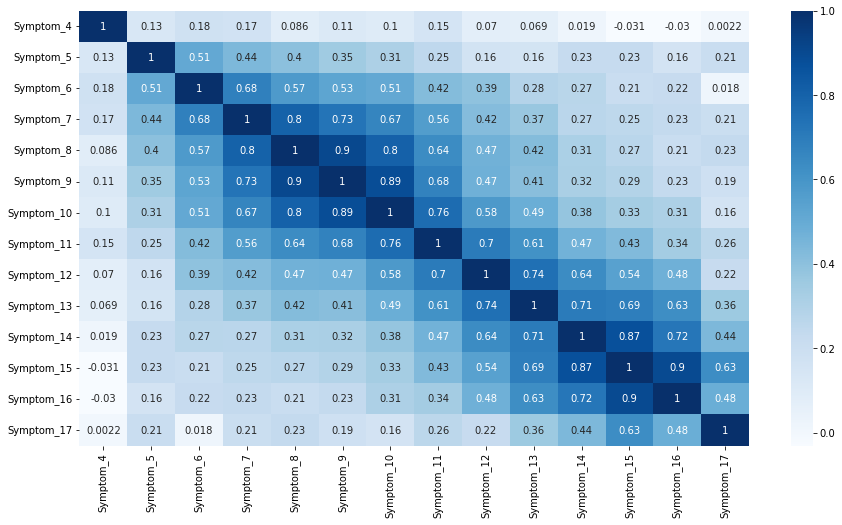

In [22]:
plt.figure(figsize=(15,8))
corr = x.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

# Split data

untuk training

In [23]:
data_train_x = x[:-920]
data_train_y = y[:-920]

untuk validation

In [24]:
data_x_validation=x[-920:]
data_y_validation=y[-920:]

In [25]:
data_train_x

,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,7,3,5,4,4,6,5,4,0,0,0,0,0,0
3996,4,5,4,4,6,5,4,2,0,0,0,0,0,0
3997,3,4,4,4,4,4,6,5,2,0,0,0,0,0
3998,4,4,5,0,0,0,0,0,0,0,0,0,0,0


In [26]:
data_train_y

0       15
1       15
2       15
3       15
4       15
        ..
3995    37
3996    40
3997    19
3998    20
3999    21
Name: label, Length: 4000, dtype: int32